In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from importlib import reload
plt=reload(plt)
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import datetime
import seaborn as sns
from scipy import sparse
# import mglearn

#Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2
import matplotlib.ticker as ticker

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
from sklearn import neighbors
# import mglearn

In [4]:
# 특징
X = [[10.0], [8.0], [13.0], [9.0], [11.0], [14.0],
     [6.0], [4.0], [12.0], [7.0], [5.0]]

# 종속 변수
y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96,
     7.24, 4.26, 10.84, 4.82, 5.68]

In [5]:
x = np.array(X).flatten()

In [6]:
model = LinearRegression()

In [7]:
model.fit(X, y)

LinearRegression()

In [8]:
print(model.coef_)

[0.50009091]


In [9]:
print(model.intercept_)

3.0000909090909094


In [10]:
y_pred = model.predict([[0], [1]])

In [11]:
print(y_pred)

[3.00009091 3.50018182]


In [12]:
sns.set_theme(color_codes=True)

C:\Users\Chulwoong Oh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

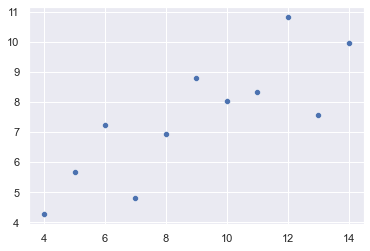

In [13]:
sns.scatterplot(x, y)

C:\Users\Chulwoong Oh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

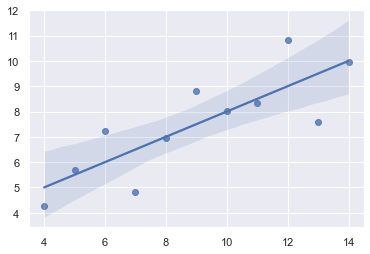

In [14]:
sns.regplot(x, y)

In [15]:
df = pd.DataFrame({'x':x, 'y':y})

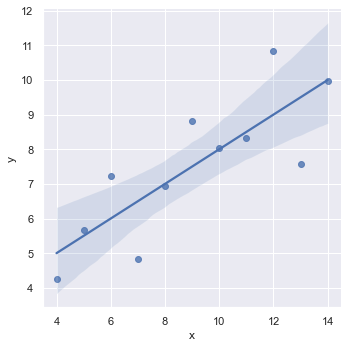

In [16]:
sns.lmplot(x='x', y='y', data = df)

In [17]:
anscombe = sns.load_dataset('anscombe')

In [18]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


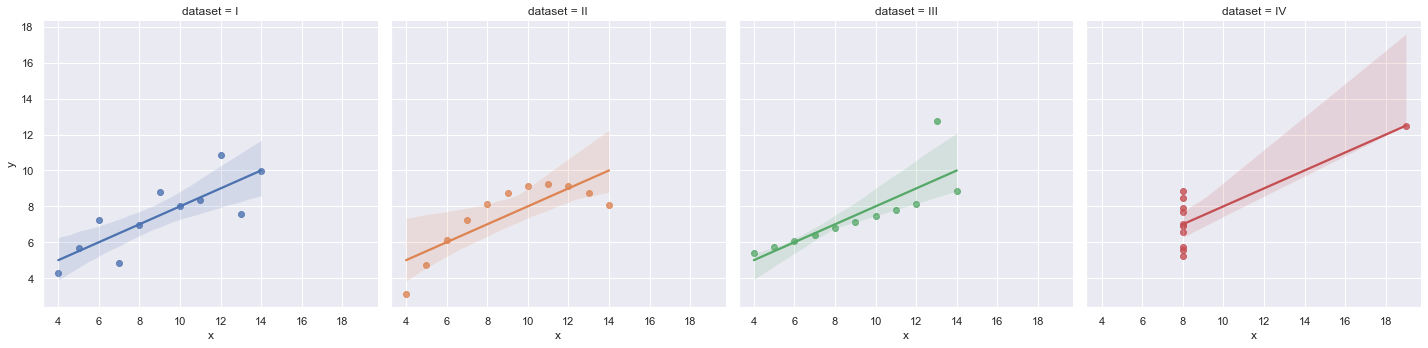

In [19]:
sns.lmplot(x='x', y='y', data = anscombe, hue = 'dataset', col = 'dataset')

0 uniform


<AxesSubplot:>

<AxesSubplot:>

1 distance


<AxesSubplot:>

<AxesSubplot:>

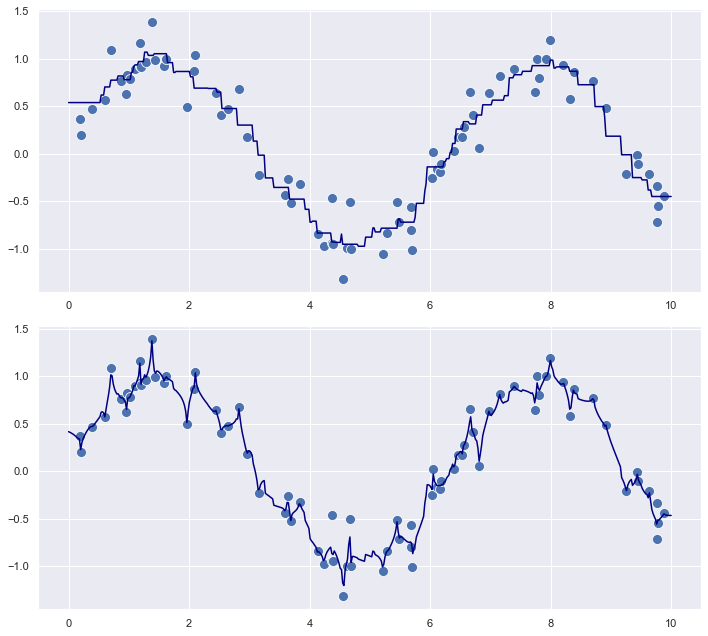

In [20]:
np.random.seed(0)
X = np.sort(10 * np.random.rand(80, 1), axis = 0)
T = np.linspace(0, 10, 500)[:, np.newaxis]
y = np.sin(X).ravel()
# sns.scatterplot(x = X[:, 0], y = y)

y[::2] += 1 * (0.5 - np.random.rand(40))

n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    print(i, weights)
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights = weights)
    y_ = knn.fit(X, y).predict(T)
    
    plt.subplot(2, 1, i + 1)#, figsize = (6,3))
    plt.gcf().set_size_inches(10, 9)
    # plt.figure(figsize=(6,3))
    sns.scatterplot(x = X[:, 0], y = y, palette = 'rainbow', marker = "o", s = 100)
    plt.plot(T, y_, color = 'navy')
plt.tight_layout()
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# from sklearn.metrics import mean_squared_error

train_size = 200
test_size = 120
train_X = np.random.uniform(low = 0, high = 1.2, size = train_size)
test_X = np.random.uniform(low = 0.1, high = 1.3, size = test_size)
train_y = np.sin(train_X * 2 * np.pi) + np.random.normal(0, 0.2, train_size)
test_y = np.sin(test_X * 2 * np.pi) + np.random.normal(0, 0.2, test_size)
poly = PolynomialFeatures(6)
train_poly_X = poly.fit_transform(train_X.reshape(train_size, 1))
test_poly_X = poly.fit_transform(test_X.reshape(test_size, 1))
model = Ridge(alpha = 1.0)
model.fit(train_poly_X, train_y)
train_pred_y = model.predict(train_poly_X)
test_pred_y = model.predict(test_poly_X)

print(mean_squared_error(train_pred_y, train_y))
print(mean_squared_error(test_pred_y, test_y))

Ridge()

0.17489781841271793
0.45645257430158576


C:\Users\Chulwoong Oh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

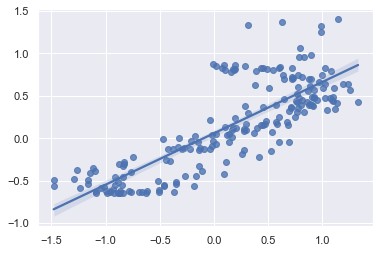

In [45]:
sns.regplot(train_y, train_pred_y)

C:\Users\Chulwoong Oh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

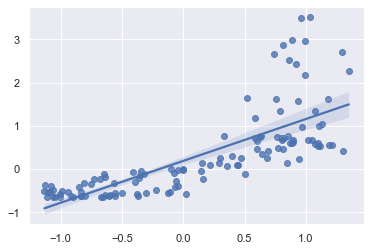

In [46]:
sns.regplot(test_y, test_pred_y)

C:\Users\Chulwoong Oh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

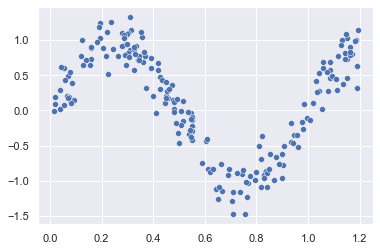

In [47]:
sns.scatterplot(train_X, train_y)

LogisticRegression()

array([0.63157843, 0.78544465, 0.97271479])

<AxesSubplot:>

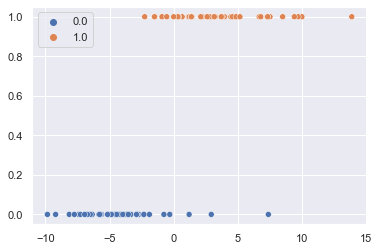

In [86]:
from sklearn.linear_model import LogisticRegression

X_train = np.r_[np.random.normal(4, 3, size = 50), np.random.normal(-4, 3, size = 50)].reshape((100, -1))

X_train1 = X_train.flatten()

y_train = np.r_[np.ones(50), np.zeros(50)]

model = LogisticRegression(solver = 'lbfgs')


model.fit(X_train, y_train)

model.predict_proba([[0], [1], [4]])[:, 1]

sns.scatterplot(x = X_train1, y = y_train, hue = y_train)

In [143]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

centers = [(-1, -0.125), (0.5, 0.5)]

X, y = make_blobs(n_samples = 200, n_features=2, centers = centers, cluster_std = 0.5)

sns.scatterplot(x=X[:,0],y=X[:,1],hue = y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

model = LinearSVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_pred, y_test)


In [ ]:
???                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 